# Sucrose Infusions  


Target Regions:  
* Delta  
  - BLA Water vs. Sucrose 5%  
  - BLA Water vs. Sucrose 15%  
  - NAcc : Water vs. Sucrose 5%
* Beta  
* Low Gamma

TOC:
1. Setup Data
    - Input Features X   
       * one-hot encoding on MouseID  
    - Target Variable y
       * label encoding on Reward  

2. Setup Model  
    {Linear} SVM w/ nested Cross Validation  
    
    
       

--- 
       
       
  

for Delta: BLA: W vs. 5% & W vs. 15%; NAcc: W vs. 5% & W vs. 15%;  
 or Beta: PFC: W vs. 5% & W vs. 15%; NAcc: W vs. 5% & W vs. 15%; vHip: W vs. 5% & W vs. 15%;  
for low gamma: NAcc: W vs. 5% & W vs. 15%; vHip: W vs. 5% & W vs. 15%;  

In [2]:
"""
# Import packages
"""

import pandas as pd
import glob, os 
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Load Data  

---

In [3]:
##print(os.getcwd())
path="C:\\Users\\19802\\Documents\\nibl\\mouse_data\\Sucrose_infusions_dataframe_Eric.csv" # set path to file
data=pd.read_csv(path) # read in as dataframe


View Data  


In [4]:
data["Reward"].unique()

array(['None', 'Water', 'Sucrose_5', 'Sucrose_15'], dtype=object)

In [5]:
display(data.head())

,Time(s),PFC_delta,PFC_theta,PFC_alpha,PFC_beta,PFC_low_gamma,PFC_high_gamma,BLA_delta,BLA_theta,BLA_alpha,BLA_beta,BLA_low_gamma,BLA_high_gamma,NAc_delta,NAc_theta,NAc_alpha,NAc_beta,NAc_low_gamma,NAc_high_gamma,vHip_delta,vHip_theta,vHip_alpha,vHip_beta,vHip_low_gamma,vHip_high_gamma,Reward,MouseId
0,0.0,0.000003,0.000003,7.761625e-07,0.000002,0.000002,3.155750e-07,0.000003,0.000005,0.000002,0.000004,0.000012,7.465025e-07,0.000043,0.000022,0.000007,0.000008,0.000010,0.000001,0.000047,0.000040,0.000025,0.000012,0.000010,1.251572e-06,None,E_A1
1,0.1,0.000003,0.000003,8.544600e-07,0.000002,0.000002,3.000700e-07,0.000003,0.000004,0.000003,0.000005,0.000012,6.375900e-07,0.000050,0.000030,0.000006,0.000005,0.000010,0.000001,0.000048,0.000047,0.000022,0.000011,0.000011,8.988825e-07,None,E_A1
2,0.2,0.000004,0.000004,8.624575e-07,0.000002,0.000002,2.604275e-07,0.000002,0.000002,0.000002,0.000005,0.000014,6.077150e-07,0.000053,0.000032,0.000006,0.000006,0.000011,0.000001,0.000035,0.000052,0.000018,0.000013,0.000012,1.226840e-06,None,E_A1
3,0.3,0.000004,0.000004,1.036505e-06,0.000001,0.000002,3.160525e-07,0.000003,0.000001,0.000002,0.000004,0.000013,7.073275e-07,0.000039,0.000021,0.000006,0.000005,0.000012,0.000001,0.000037,0.000054,0.000017,0.000015,0.000011,1.399655e-06,None,E_A1
4,0.4,0.000004,0.000004,9.465525e-07,0.000001,0.000002,2.424750e-07,0.000002,0.000002,0.000003,0.000004,0.000014,7.688175e-07,0.000037,0.000022,0.000005,0.000004,0.000010,0.000001,0.000032,0.000059,0.000021,0.000017,0.000013,1.546173e-06,None,E_A1


In [6]:
print(data.columns.values)

['Time(s)' 'PFC_delta' 'PFC_theta' 'PFC_alpha' 'PFC_beta' 'PFC_low_gamma'
 'PFC_high_gamma' 'BLA_delta' 'BLA_theta' 'BLA_alpha' 'BLA_beta'
 'BLA_low_gamma' 'BLA_high_gamma' 'NAc_delta' 'NAc_theta' 'NAc_alpha'
 'NAc_beta' 'NAc_low_gamma' 'NAc_high_gamma' 'vHip_delta' 'vHip_theta'
 'vHip_alpha' 'vHip_beta' 'vHip_low_gamma' 'vHip_high_gamma' 'Reward'
 'MouseId']


In [7]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating data
X = data[['BLA_delta', 'Time(s)' ]]
X=X.to_numpy()

Y =data['Reward']
le = preprocessing.LabelEncoder() # initialize encoder obj
Y= le.fit_transform(Y) # fit and transform the 5% data



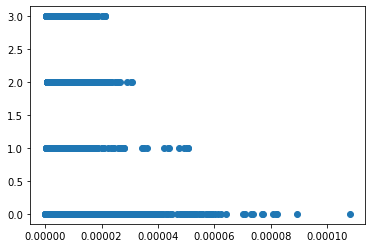

-903.413798818712


In [8]:
plt.scatter(X[:, 0], Y)
plt.show()
#plt.scatter(X[:, 1], Y)
#plt.show()

# Applying linear reg
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, Y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), Y))

In [ ]:
clf = SVC()
scores = cross_val_score(clf, X, Y, cv=10)

In [9]:
tree = DecisionTreeClassifier()
tree.fit(X, Y)

DecisionTreeClassifier()

In [50]:
sum(abs(tree.predict(X) - Y))

15496

In [10]:
tree.feature_importances_

array([0.34204229, 0.65795771])

In [12]:
sum(abs(tree.predict(X) - Y))

684

In [10]:
# separate for test set 
data_small=data[data['MouseId'].isin(['E_A1', 'E_A3'])]
data_small.tail()

,Time(s),PFC_delta,PFC_theta,PFC_alpha,PFC_beta,PFC_low_gamma,PFC_high_gamma,BLA_delta,BLA_theta,BLA_alpha,BLA_beta,BLA_low_gamma,BLA_high_gamma,NAc_delta,NAc_theta,NAc_alpha,NAc_beta,NAc_low_gamma,NAc_high_gamma,vHip_delta,vHip_theta,vHip_alpha,vHip_beta,vHip_low_gamma,vHip_high_gamma,Reward,MouseId
57186,4538.0,0.000003,0.000001,4.236389e-07,9.178223e-07,5.120134e-07,1.272260e-07,0.000004,0.000004,0.000005,0.000002,0.000003,5.272550e-07,0.000017,0.000004,0.000001,0.000003,0.000002,8.146167e-07,0.000021,0.000036,0.000008,0.000004,0.000002,8.090275e-07,None,E_A3
57187,4538.1,0.000003,0.000001,4.189762e-07,1.026438e-06,4.662107e-07,1.159059e-07,0.000004,0.000004,0.000004,0.000002,0.000002,5.204800e-07,0.000016,0.000007,0.000002,0.000003,0.000002,6.897800e-07,0.000019,0.000034,0.000008,0.000004,0.000002,7.608575e-07,None,E_A3
57188,4538.2,0.000003,0.000002,4.487163e-07,1.165271e-06,4.521441e-07,1.199543e-07,0.000004,0.000004,0.000004,0.000002,0.000002,5.290200e-07,0.000017,0.000007,0.000002,0.000003,0.000002,7.036933e-07,0.000018,0.000034,0.000008,0.000004,0.000002,7.554750e-07,None,E_A3
57189,4538.3,0.000003,0.000002,3.847968e-07,1.221628e-06,4.226685e-07,1.411656e-07,0.000003,0.000005,0.000005,0.000003,0.000003,5.450700e-07,0.000013,0.000007,0.000003,0.000004,0.000002,7.214300e-07,0.000018,0.000033,0.000008,0.000005,0.000002,7.141625e-07,None,E_A3
57190,4538.4,0.000002,0.000001,4.708521e-07,1.163680e-06,4.301541e-07,1.576603e-07,0.000003,0.000003,0.000005,0.000002,0.000003,6.069075e-07,0.000009,0.000005,0.000002,0.000003,0.000002,7.633567e-07,0.000021,0.000025,0.000008,0.000005,0.000002,7.340625e-07,None,E_A3


In [11]:
data_small['Reward'].unique()

array(['None', 'Water', 'Sucrose_5', 'Sucrose_15'], dtype=object)

In [12]:
data.dtypes

Time(s)            float64
PFC_delta          float64
PFC_theta          float64
PFC_alpha          float64
PFC_beta           float64
PFC_low_gamma      float64
PFC_high_gamma     float64
BLA_delta          float64
BLA_theta          float64
BLA_alpha          float64
BLA_beta           float64
BLA_low_gamma      float64
BLA_high_gamma     float64
NAc_delta          float64
NAc_theta          float64
NAc_alpha          float64
NAc_beta           float64
NAc_low_gamma      float64
NAc_high_gamma     float64
vHip_delta         float64
vHip_theta         float64
vHip_alpha         float64
vHip_beta          float64
vHip_low_gamma     float64
vHip_high_gamma    float64
Reward              object
MouseId             object
dtype: object

### Standardize Data

In [29]:
data['MouseId'].unique()

array(['E_A1', 'E_A3', 'E_A5', 'E_A7', 'E_A8'], dtype=object)

In [30]:
data=pd.get_dummies(data, columns=["MouseId"])
data_small=pd.get_dummies(data_small, columns=['MouseId'])

In [31]:
#data.head()
data_small.head()

,Time(s),PFC_delta,PFC_theta,PFC_alpha,PFC_beta,PFC_low_gamma,PFC_high_gamma,BLA_delta,BLA_theta,BLA_alpha,BLA_beta,BLA_low_gamma,BLA_high_gamma,NAc_delta,NAc_theta,NAc_alpha,NAc_beta,NAc_low_gamma,NAc_high_gamma,vHip_delta,vHip_theta,vHip_alpha,vHip_beta,vHip_low_gamma,vHip_high_gamma,Reward,MouseId_E_A1,MouseId_E_A3
0,0.0,0.000003,0.000003,7.761625e-07,0.000002,0.000002,3.155750e-07,0.000003,0.000005,0.000002,0.000004,0.000012,7.465025e-07,0.000043,0.000022,0.000007,0.000008,0.000010,0.000001,0.000047,0.000040,0.000025,0.000012,0.000010,1.251572e-06,None,1,0
1,0.1,0.000003,0.000003,8.544600e-07,0.000002,0.000002,3.000700e-07,0.000003,0.000004,0.000003,0.000005,0.000012,6.375900e-07,0.000050,0.000030,0.000006,0.000005,0.000010,0.000001,0.000048,0.000047,0.000022,0.000011,0.000011,8.988825e-07,None,1,0
2,0.2,0.000004,0.000004,8.624575e-07,0.000002,0.000002,2.604275e-07,0.000002,0.000002,0.000002,0.000005,0.000014,6.077150e-07,0.000053,0.000032,0.000006,0.000006,0.000011,0.000001,0.000035,0.000052,0.000018,0.000013,0.000012,1.226840e-06,None,1,0
3,0.3,0.000004,0.000004,1.036505e-06,0.000001,0.000002,3.160525e-07,0.000003,0.000001,0.000002,0.000004,0.000013,7.073275e-07,0.000039,0.000021,0.000006,0.000005,0.000012,0.000001,0.000037,0.000054,0.000017,0.000015,0.000011,1.399655e-06,None,1,0
4,0.4,0.000004,0.000004,9.465525e-07,0.000001,0.000002,2.424750e-07,0.000002,0.000002,0.000003,0.000004,0.000014,7.688175e-07,0.000037,0.000022,0.000005,0.000004,0.000010,0.000001,0.000032,0.000059,0.000021,0.000017,0.000013,1.546173e-06,None,1,0


Setup y

In [32]:
yy=data_small['Reward']

cond_mask=data_small["Reward"].isin(['Water', "Sucrose_5"])

y_s5=yy[cond_mask]
print(y_s5.unique())


session = data_small[cond_mask].to_records(index=False)
print(session.dtype.names)

['Water' 'Sucrose_5']
('Time(s)', 'PFC_delta', 'PFC_theta', 'PFC_alpha', 'PFC_beta', 'PFC_low_gamma', 'PFC_high_gamma', 'BLA_delta', 'BLA_theta', 'BLA_alpha', 'BLA_beta', 'BLA_low_gamma', 'BLA_high_gamma', 'NAc_delta', 'NAc_theta', 'NAc_alpha', 'NAc_beta', 'NAc_low_gamma', 'NAc_high_gamma', 'vHip_delta', 'vHip_theta', 'vHip_alpha', 'vHip_beta', 'vHip_low_gamma', 'vHip_high_gamma', 'Reward', 'MouseId_E_A1', 'MouseId_E_A3')


In [33]:
#Y=data['Reward']
#Y_small=data_small["Reward"]

Label Encoding on target variables Y

In [34]:
#le = preprocessing.LabelEncoder()
#le.fit(Y)
#y_enc = le.transform(Y)

In [35]:
le = preprocessing.LabelEncoder()
le.fit(y_s5)
y_s5_enc = le.transform(y_s5)

In [36]:
print(y_s5_enc.shape)

(2091,)


In [37]:
#delta_bla=data[["BLA_delta", 'Time(s)']] # get target features
#db5_X=delta_bla.to_numpy() # convert data to numpy array
delta_bla = data_small[cond_mask]
delta_bla=delta_bla[["BLA_delta", 'Time(s)', 'MouseId_E_A1', 'MouseId_E_A3']] # get target features
scaler = preprocessing.StandardScaler() # initialize scale object
# Fit the scaler to the feature data and transform
X_db = scaler.fit_transform(delta_bla) # fit and transform 


In [38]:
X_db.shape

(2091, 4)

### Model Design

In [39]:
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)


In [40]:
from sklearn.svm import SVC
# define the model
svc = SVC(kernel='linear', max_iter=10000)

In [41]:
#Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 10, 100, 300]}
grid = GridSearchCV(svc,param_grid ,scoring='accuracy', verbose=1, n_jobs=1, cv=cv_inner)


In [45]:
# configure the cross-validation procedure
from numpy import mean,std

cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(grid, X_db, y_s5_enc, scoring='accuracy', cv=cv_outer, n_jobs=3)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.602 (0.117)


**Initialize a gridsearch object with the support vector classifier and the parameter grid.**

In [ ]:
svm = SVC(kernel="linear", max_iter=10000)

# Create a gridsearch object with the support vector classifier and the C value candidates
clf = GridSearchCV(estimator=svm, param_grid=C_candidates)



In [ ]:
# Fit the cross validated grid search on the data 
clf.fit(X_db, y_small_enc)

# Show# the best value for C
clf.best_estimator_.C



## Delta   
---


  - BLA Water vs. Sucrose 5%  
  - BLA Water vs. Sucrose 15%  
  - NAcc : Water vs. Sucrose 5%

Setup X

In [ ]:
cross_val_score(clf, X_db, y_small_enc)


**Setup nested CV**

In [ ]:
# Number of rounds
rounds = 20


                #'gamma': [100, 200, 400]}


# We will use a Support Vector Classifier with "rbf" kernel

# Arrays to store scores
#Create arrays to store the scores
outer_scores = np.zeros(rounds)
nested_scores = np.zeros(rounds)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(db5_X, db5_y, shuffle=True,test_size=0.3,random_state=3) # 70% training and 30% test


In [ ]:
#Predict the response for test dataset
y_pred=SVM.predict(X_test)

In [ ]:
np.unique(y_pred)#Predict the response for test dataset


In [ ]:
X_test

In [ ]:
(np.unique(y_test))

Evaluate Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# Loop for each round
for i in range(rounds):
    # Loop for each trial# Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=param_grid, cv=inner_cv)
    clf.fit(db5_X, db5_y)
    outer_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=db5_X, y=db5_y, cv=outer_cv)
    nested_scores = nested_score.mean()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
"""
# Plotting Functions
"""
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy



def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#clf=SVC(kernel='linear', C=1)
title='SVC with linear kernel'
ax=sub#.flatten()

In [ ]:
#clf.fit(db5_X[:1000], db5_y[:1000])

In [ ]:
X0, X1 = db5_X[:, 0], db5_X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [ ]:
plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=db5_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Delta BLA ')
ax.set_ylabel('Reward')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

In [ ]:
plt.figure(figsize=(8, 6))

# -- methods -- 


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
X=s5_db_data
y=y_s5
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='linear', C=C, max_iter=10000),
          LinearSVC(C=C, max_iter=10000),
          SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000),
          SVC(kernel='poly', degree=2, gamma='auto', C=C, max_iter=10000))
models = (clf.fit(s5_db_data,y_s5 ) for clf in models)


# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

---

## Beta 
*Beta: PFC: W vs. 5% & W vs. 15%; NAcc: W vs. 5% & W vs. 15%; vHip: W vs. 5% & W vs. 15%;  


---

## Low Gamma
low gamma: NAcc: W vs. 5% & W vs. 15%; vHip: W vs. 5% & W vs. 15%;  


---